# Pràctica 1 - Regressió

## Apartat (C): Analitzant Dades

Ens trobem dabant d'una base de dades respecte les **carcteristiques del formigó**, on trobem tant la seva **composició**, **edat de vida** i l'**esforç** que es capaç d'aguantar, sent aquest últim potser el que té més interés. Analitzarem més en profunditat aquestes dades per veure en profunditat les característiques de la base de dades.

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Definim veure només els 2 primers decimals de les mostres
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Funció per llegir dades d'un csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carregem la base de dades
dataset = load_dataset('Concrete_Data_Yeh.csv')
data = dataset.values

x = data[:, :2]
y = data[:, 2]

print("Forma de la base de dades:", dataset.shape)
print("Dimensions de la entrada x:", x.shape)
print("Dimensió dels atributs y:", y.shape)

Forma de la base de dades: (1030, 9)
Dimensions de la entrada x: (1030, 2)
Dimensió dels atributs y: (1030,)


Les etiquetes que ens indiquen les entrades son les que es poden veure a continuació:

In [2]:
print ('Etiquetes:', dataset.keys())

Etiquetes: Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')


Cadascuna representa les caracteristiques del formigó:
- cement: kg per cada $m^3$ de la barreja
- blast furnace slag: kg per cada $m^3$ de la barreja
- fly ash: kg per cada $m^3$ de la barreja
- water: kg per cada $m^3$ de la barreja
- superplasticizer: kg per cada $m^3$ de la barreja
- coarse aggregate: kg per cada $m^3$ de la barreja
- fine aggregate: kg per cada $m^3$ de la barreja
- age: en dies
- csMPa/compresive strength: força de compressió en MPa

Per començar a treballar amb aquest conjunt de dades, ens interessa saber quines variables poden tenir valors no existents. Podem observar que no hi ha cap valor nul en les mostres:

In [3]:
print(dataset.isnull().sum())

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


In [4]:
dataset.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.45
75%,350.00,142.95,118.30,192.00,10.20,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


<IPython.core.display.Javascript object>


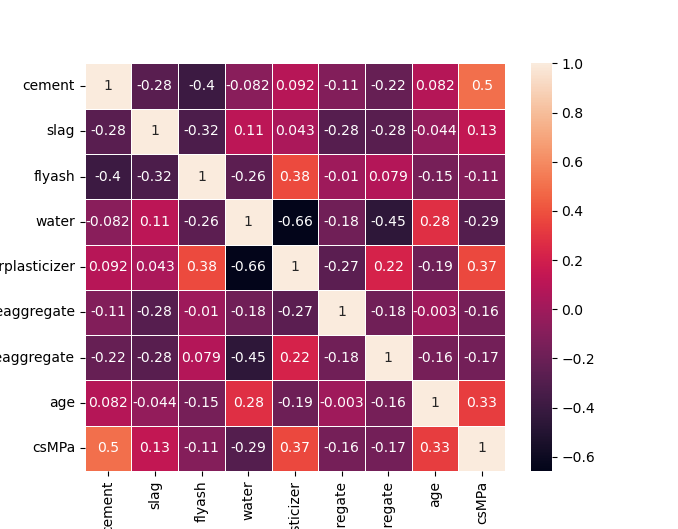

In [5]:
import seaborn as sns
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

<IPython.core.display.Javascript object>


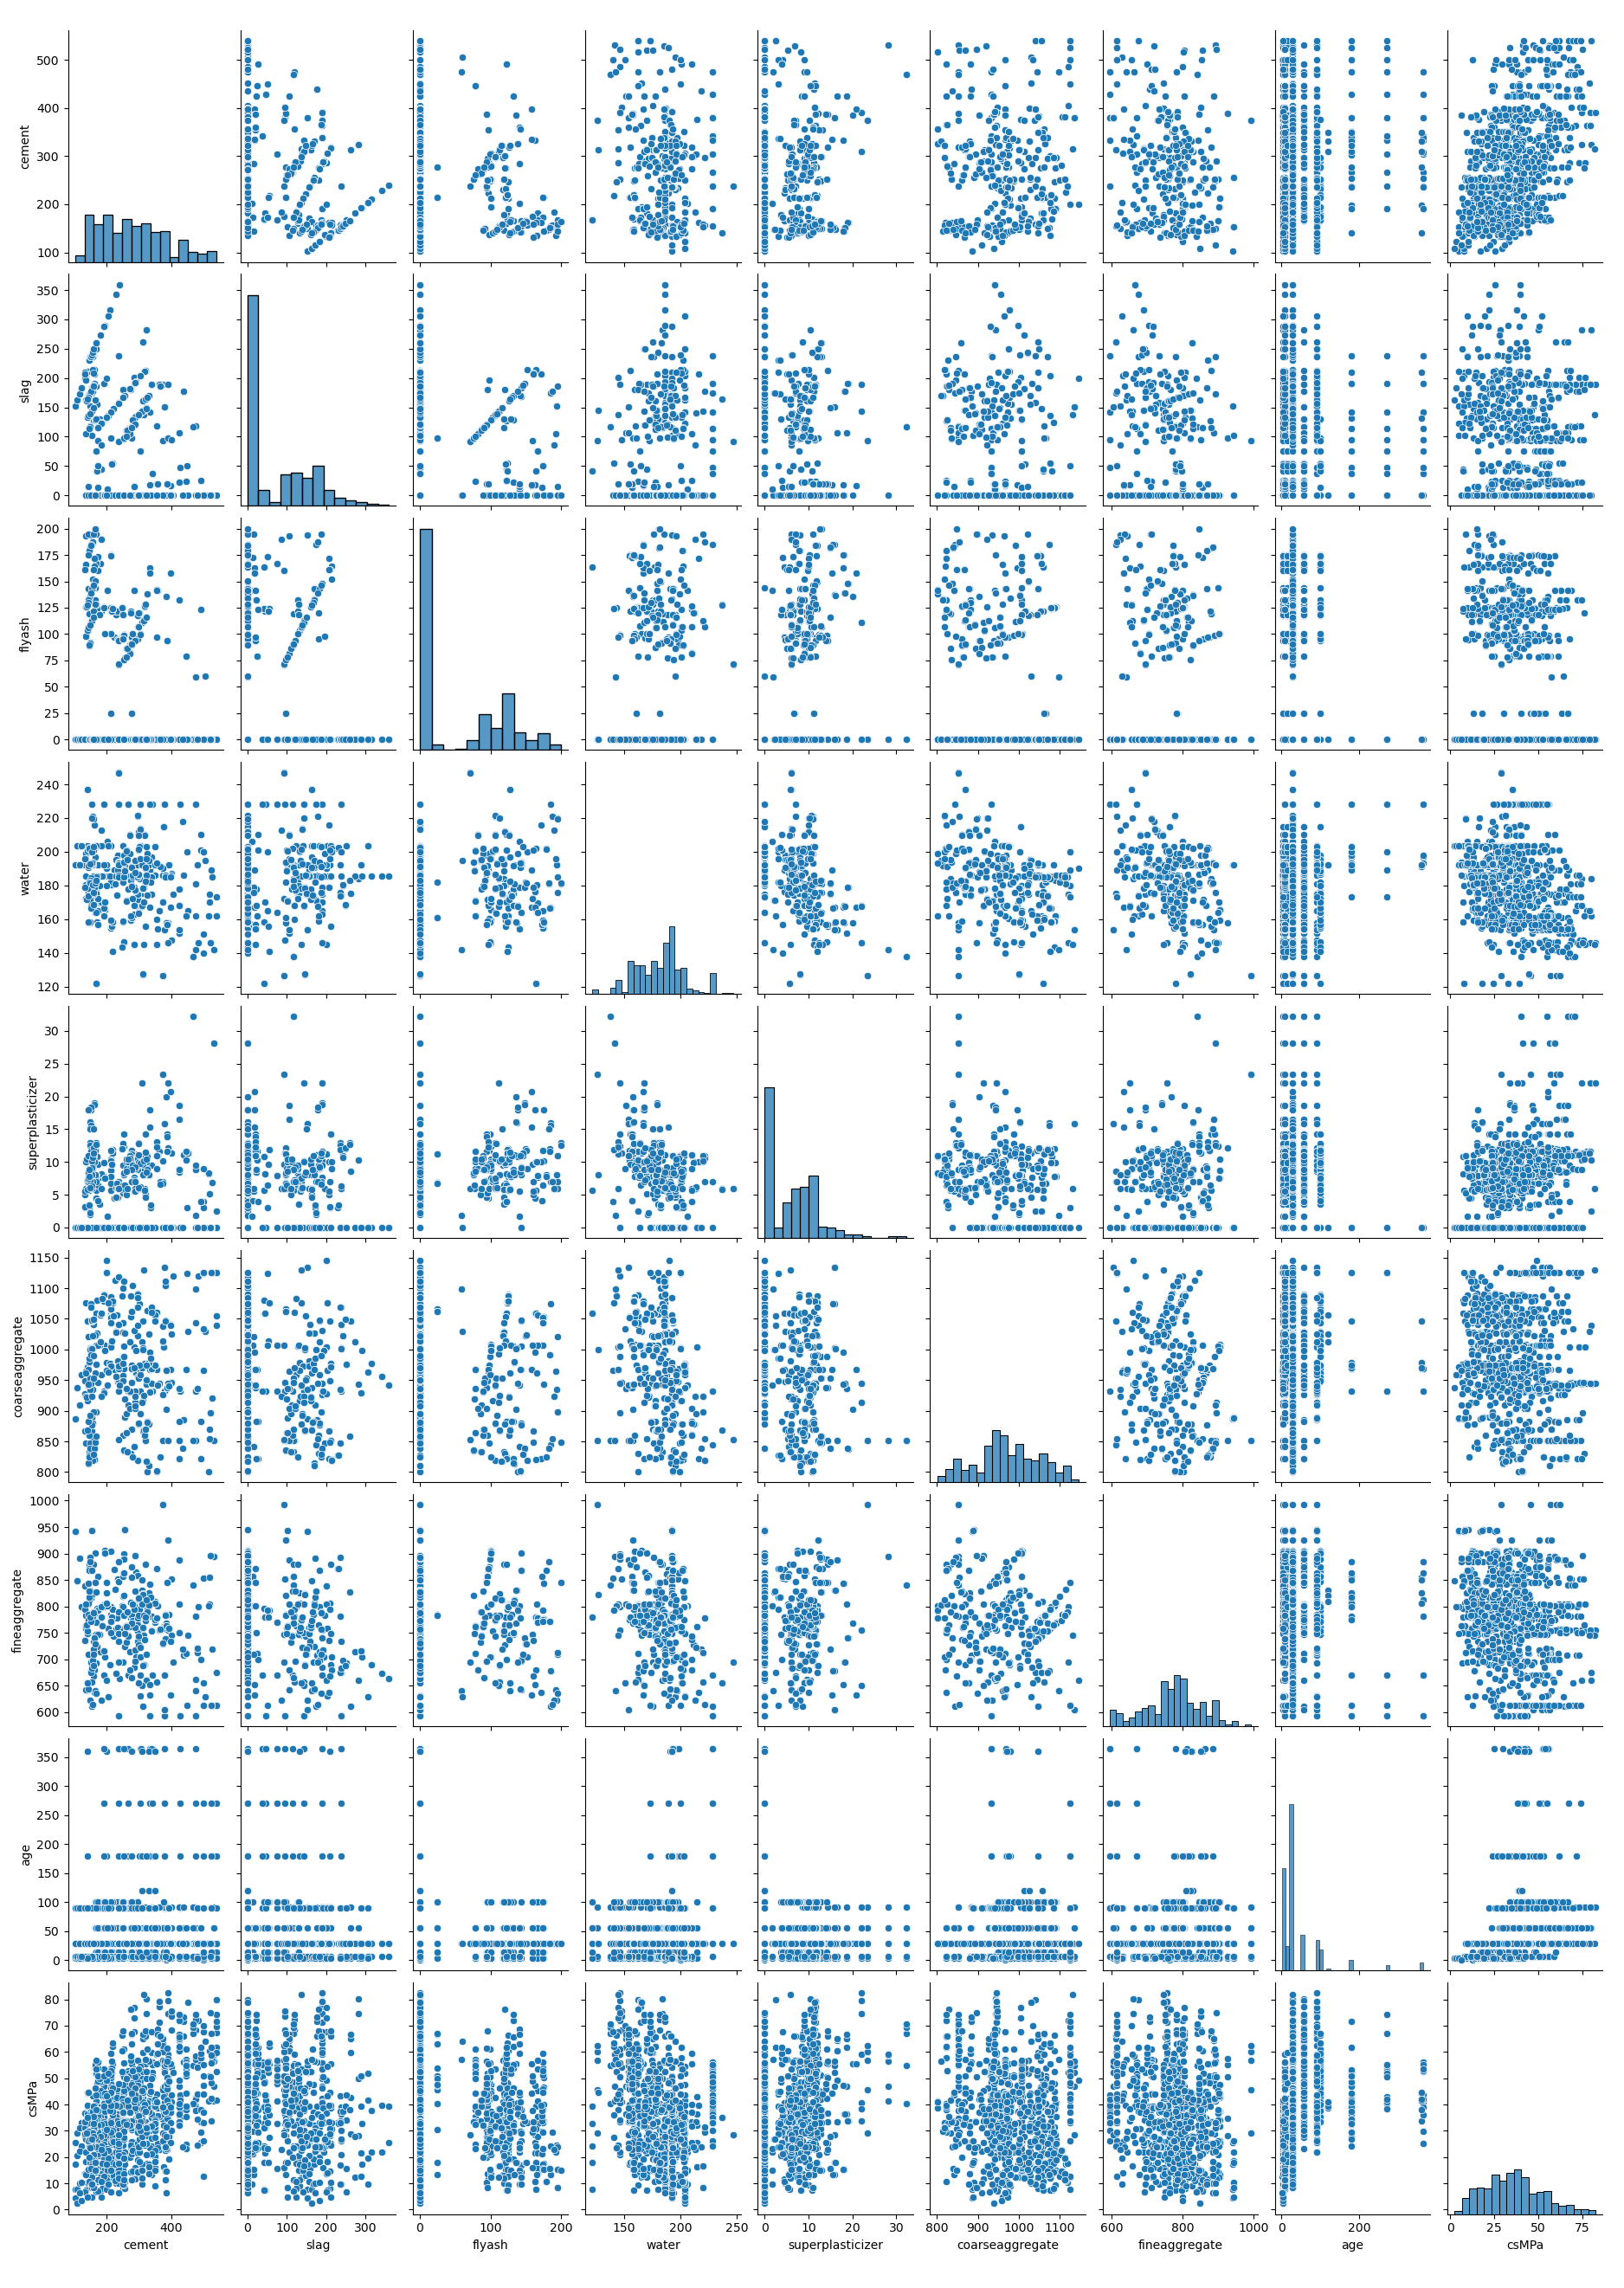

In [6]:
relacio = sns.pairplot(dataset)